<h1>TABLE OF CONTENTS<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCCIÓN" data-toc-modified-id="INTRODUCCIÓN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCCIÓN</a></span></li><li><span><a href="#DEMOSTRACIÓN-PYTHON" data-toc-modified-id="DEMOSTRACIÓN-PYTHON-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DEMOSTRACIÓN PYTHON</a></span></li><li><span><a href="#EJERCICIO" data-toc-modified-id="EJERCICIO-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EJERCICIO</a></span></li><li><span><a href="#SOLUCIÓN" data-toc-modified-id="SOLUCIÓN-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SOLUCIÓN</a></span></li><li><span><a href="#EXPORTAR-A-HTML" data-toc-modified-id="EXPORTAR-A-HTML-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EXPORTAR A HTML</a></span></li></ul></div>

# INTRODUCCIÓN

Puedo escribir texto y ecuaciones como si fuera latex:
$$f(x)=\sum_{k=0}^\infty (D^kf)(a)\;d_k(x-a)$$

También es posible escribir en *cursiva* o **negrita**, o hacer listas:
- Elemento 1 

Esto a la vez que inerto código en 'celdas', lo que permite comentarlo o complementarlo con cosas que crea importantes: combina texto + código

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


He instalado la mayoría de paquetes útiles que vamos a usar al principio

# DEMOSTRACIÓN PYTHON

La tabla que se muestra más abajo, y que se encuentra disponible en el fichero `limb_darkening.dat`, muestra la variación observada de la relación
\begin{equation}
\Phi(\theta)=\frac{I_{\lambda}(\tau_\lambda\!=\!0,\,\theta)}{I_{\lambda}(\tau_\lambda\!=\!0, \,\theta\!=\!0)}
\end{equation}
Representa el oscurecimiento al limbo que ocurre en el Sol en función de la longitud de onda y del ángulo entre la linea de visión y el punto de la superficie solar:

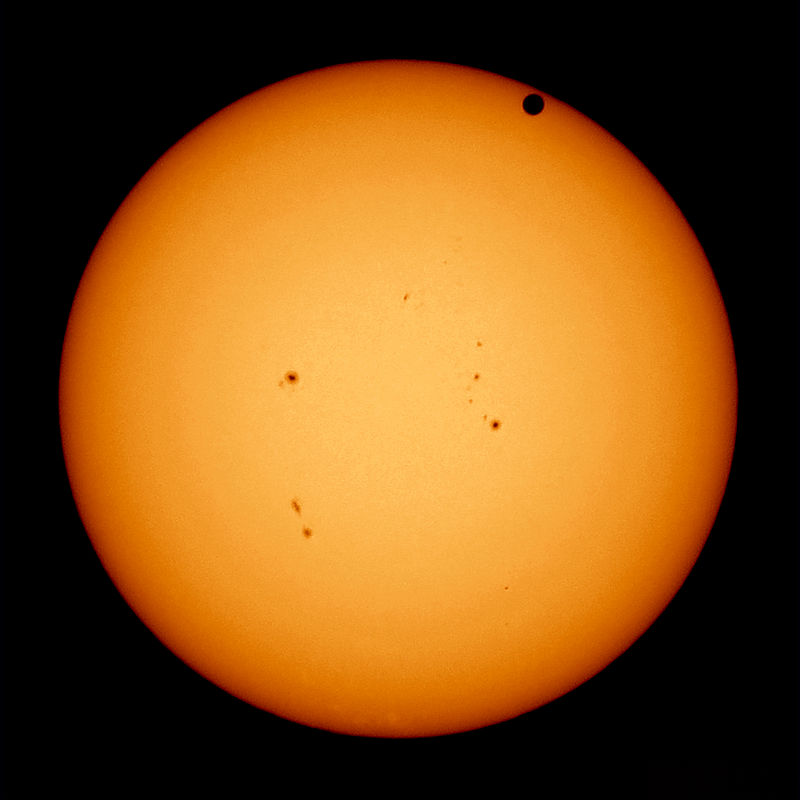

Primero le decimos a python qué paquetes queremos cargar, solo emplearemo los necesarios para lo que hagamos:

- Numpy es básico: cargar tablas, manipular vectores, etc.
- Matplotlib: para generar gráficos
- Astropy: el paquete de astro por defecto, tiene unidades y utilidadaes muy interesantes

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy import units as u
from astropy.table import Table

In [5]:
tabla = np.genfromtxt("limb_darkening.dat")
tabla

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.77, 0.83, 0.88, 0.9 , 0.91, 0.92, 0.94, 0.97, 0.98, 0.99, 0.99],
       [0.57, 0.66, 0.74, 0.79, 0.82, 0.84, 0.87, 0.92, 0.94, 0.96, 0.98],
       [0.48, 0.58, 0.68, 0.73, 0.76, 0.79, 0.83, 0.9 , 0.92, 0.95, 0.97],
       [0.39, 0.49, 0.6 , 0.66, 0.7 , 0.74, 0.78, 0.86, 0.9 , 0.94, 0.97],
       [0.3 , 0.4 , 0.51, 0.59, 0.64, 0.68, 0.73, 0.83, 0.87, 0.92, 0.96],
       [0.22, 0.32, 0.42, 0.51, 0.56, 0.61, 0.67, 0.78, 0.83, 0.89, 0.96],
       [0.14, 0.22, 0.32, 0.41, 0.47, 0.53, 0.59, 0.7 , 0.78, 0.84, 0.95],
       [0.  , 0.  , 0.19, 0.28, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

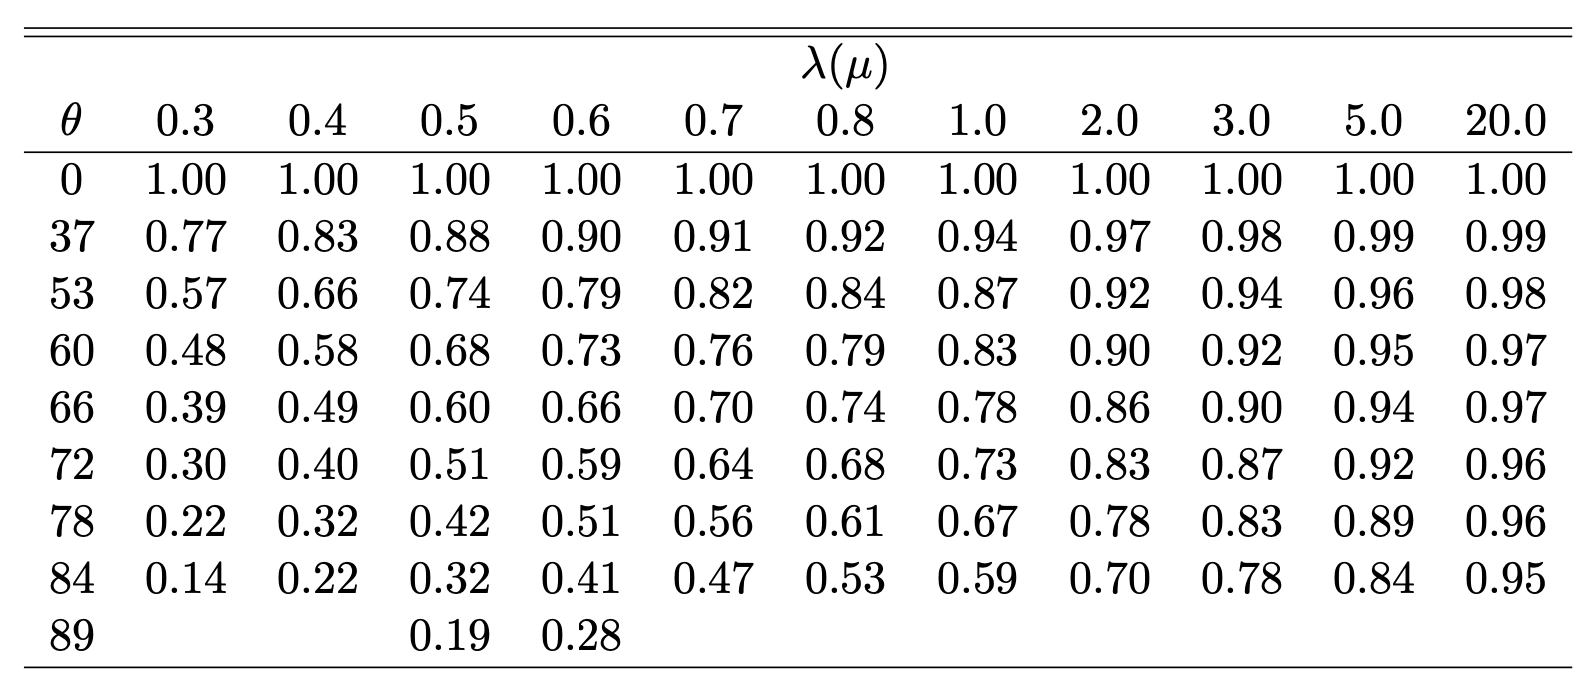

In [8]:
theta_array = np.array([0, 37, 53, 60, 66, 72, 78, 84, 89]) * u.deg
theta_array

<Quantity [ 0., 37., 53., 60., 66., 72., 78., 84., 89.] deg>

In [9]:
wave_array = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 2.0, 3.0, 5.0, 20.0]) * u.micron
wave_array

<Quantity [ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  1. ,  2. ,  3. ,  5. ,
           20. ] micron>

Voy a escoger una longitud de onda (una fila de la tabla) y representar el oscurecimiento:

Los ángulos son: [ 0. 37. 53. 60. 66. 72. 78. 84. 89.] deg
Su coseno es: [1.         0.79863551 0.60181502 0.5        0.40673664 0.30901699
 0.20791169 0.10452846 0.01745241]
El oscurecimiento al limbo es: [1.   0.9  0.79 0.73 0.66 0.59 0.51 0.41 0.28]


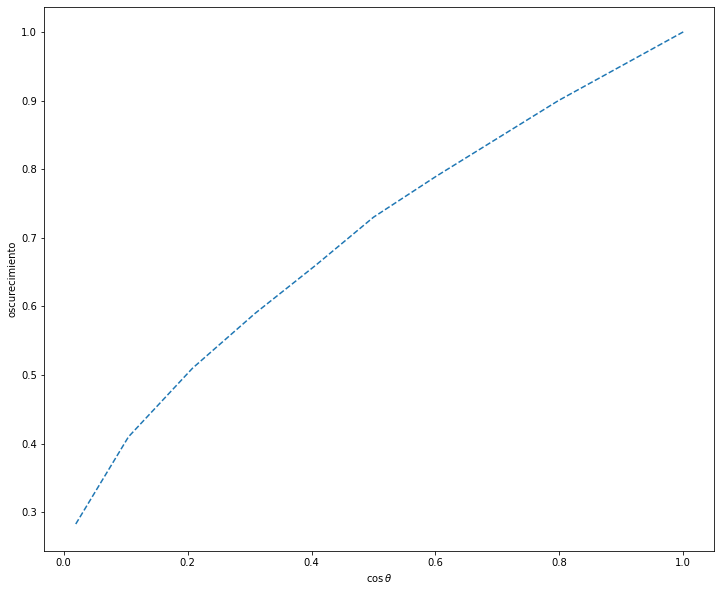

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10)) #creo la figura

x = np.cos(theta_array)
y = tabla[:,3] #en python empiezo a contar por el cero, entonces ese 3 es la columna 4 de la tabla

print(f'Los ángulos son: {theta_array}') #puedo imprimir valores como salida metiendo la variable en print
print(f'Su coseno es: {x}')
print(f'El oscurecimiento al limbo es: {y}')

ax.plot(x,y,'--');
ax.set_xlabel(r'$\cos \theta$');
ax.set_ylabel(r'oscurecimiento');

Me doy cuenta de que está mal, quiero representar los ángulos de 0 a 90, y lo está haciendo al revés, por defcto los ejes van de menor a mayor

Los ángulos son: [ 0. 37. 53. 60. 66. 72. 78. 84. 89.] deg
Su coseno es: [1.         0.79863551 0.60181502 0.5        0.40673664 0.30901699
 0.20791169 0.10452846 0.01745241]
El oscurecimiento al limbo es: [1.   0.9  0.79 0.73 0.66 0.59 0.51 0.41 0.28]


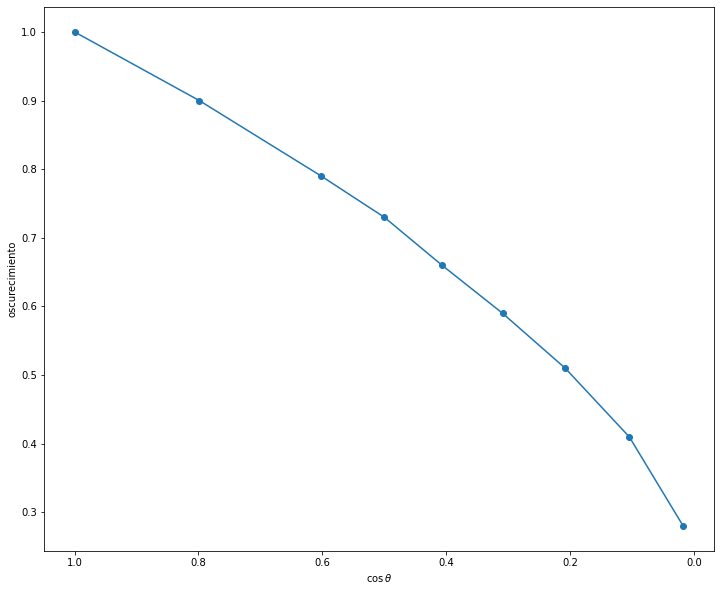

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10)) #creo la figura

x = np.cos(theta_array)
y = tabla[:,3] #en python empiezo a contar por el cero, entonces ese 3 es la columna 4 de la tabla

print(f'Los ángulos son: {theta_array}') #puedo imprimir valores como salida metiendo la variable en print
print(f'Su coseno es: {x}')
print(f'El oscurecimiento al limbo es: {y}')

ax.plot(x,y,'o-');
ax.set_xlabel(r'$\cos \theta$');
ax.set_ylabel(r'oscurecimiento');

ax.invert_xaxis()

Puedo cambiar muchos parámetros del gráfico para que quede mejor:

In [28]:
#mejoro aspecto de las figuras
%matplotlib inline
%config InlineBackend.figure_format = 'png'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.labeltop'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": ["CMU Serif"],'font.size': 20, 'axes.linewidth': 3})
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'CMU Serif'
plt.rcParams['mathtext.it'] = 'CMU Serif:italic'
plt.rcParams['mathtext.bf'] = 'CMU Serif:bold'

plt.rc('legend',fontsize='small') # fuente de leyenda

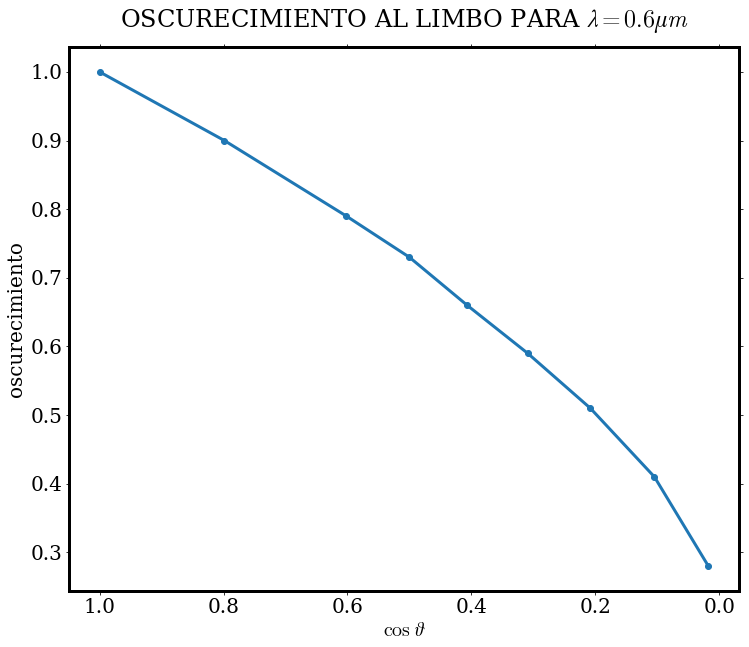

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10)) #creo la figura

x = np.cos(theta_array)
y = tabla[:,3] #en python empiezo a contar por el cero, entonces ese 3 es la columna 4 de la tabla


ax.plot(x,y,'o-',linewidth=3);
ax.set_xlabel(r'$\cos \theta$');
ax.set_ylabel(r'oscurecimiento');
ax.set_title(r'OSCURECIMIENTO AL LIMBO PARA $\lambda = 0.6 \mu m$', pad=20)

ax.invert_xaxis()

# EJERCICIO

Vamos a realizar un ajuste de datos  de linearidad de un detector CCD usando polifyt de numpy, el objetivo es:
0) Cargar los datos con Table.read()

1) Representar los datos pedidos con puntos

2) Obtener la recta de ajuste con np.polyfit()

3) Evaluarla usando np.polyval()

4) Respresentar puntos + recta

In [10]:
time = [1,10,20,40,120,240,480] * u.s
cuentas = [958.27,959.44,962.98,966.46,983.73,1009.63,1059.45] * u.adu
tab = Table([time, cuentas], names = ['tiempo','cuentas'])
tab
tab.write('datos_ejercicio.fits', format = 'fits', overwrite=True)

# SOLUCIÓN

In [34]:
datos = Table.read('datos_ejercicio.fits')

Text(0, 0.5, 'cuentas [adu]')

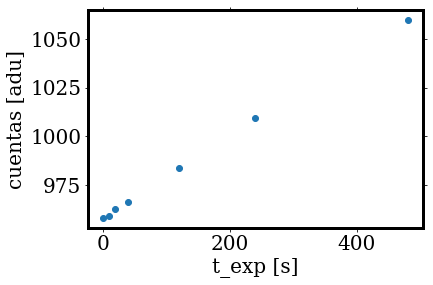

In [36]:
time = datos['tiempo'].value
cuentas = datos['cuentas'].value
plt.plot(time,cuentas,'o')
plt.xlabel('t_exp [s]')
plt.ylabel('cuentas [adu]')

Text(0, 0.5, 'cuentas [adu]')

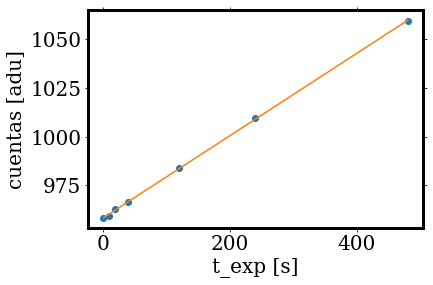

In [37]:
pol = np.polyfit(time,cuentas,1)
y_recta = np.polyval(pol,time)
plt.plot(time,cuentas,'o')
plt.plot(time,y_recta)
plt.xlabel('t_exp [s]')
plt.ylabel('cuentas [adu]')

# EXPORTAR A HTML

Jupyter me permite exportar el cuaderno a html o pdf directamente, también a scripts de python puros

In [38]:
!jupyter nbconvert --to html demostracion.ipynb

[NbConvertApp] Converting notebook demostracion.ipynb to html
[NbConvertApp] Writing 971191 bytes to demostracion.html
